In [1]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
#We now implement the Bernstein-Vazirani algorithm with Qiskit for a two bit function with  s=11 .

In [3]:
#We first set the number of qubits used in the experiment,
#and the hidden integer  s  to be found by the algorithm. 
#The hidden integer  s  determines the circuit for the quantum oracle.

In [29]:
nQubits = 4 # number of physical qubits used to represent s
s = 11       # the hidden integer 

# make sure that a can be represented with nqubits
s = s % 2**(nQubits)

In [30]:
#We then use Qiskit to program the Bernstein-Vazirani algorithm.

In [31]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
qr = QuantumRegister(nQubits)
# bits for recording the measurement on qr
cr = ClassicalRegister(nQubits)

bvCircuit = QuantumCircuit(qr, cr)
barriers = True

# Apply Hadamard gates before querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Apply barrier 
if barriers:
    bvCircuit.barrier()

# Apply the inner-product oracle
for i in range(nQubits):
    if (s & (1 << i)):
        bvCircuit.z(qr[i])
    else:
        bvCircuit.iden(qr[i])
        
# Apply barrier 
if barriers:
    bvCircuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Apply barrier 
if barriers:
    bvCircuit.barrier()

# Measurement
bvCircuit.measure(qr, cr)

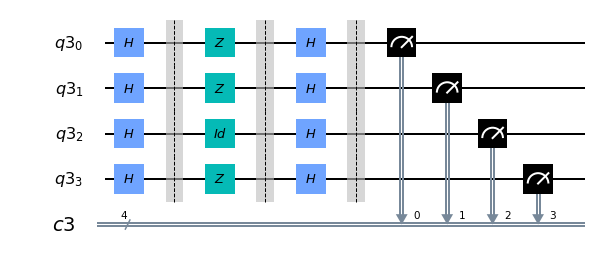

In [32]:
bvCircuit.draw(output='mpl')

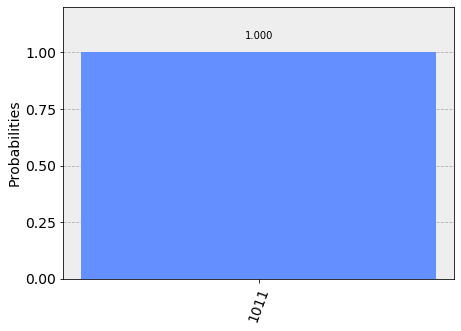

In [33]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [34]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_vigo


In [35]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(bvCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


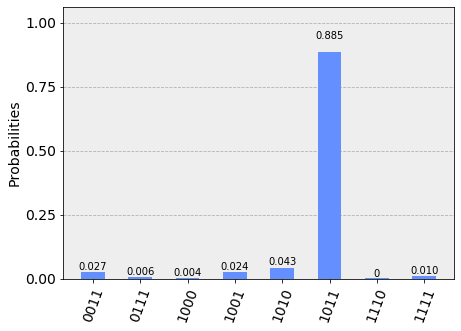

In [36]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)